In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [87]:
gold = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\ML\Gold_price_Prediction\dataset\gld_price_data.csv')

In [88]:
gold.shape

(2290, 6)

In [89]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [90]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [91]:
gold.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [92]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


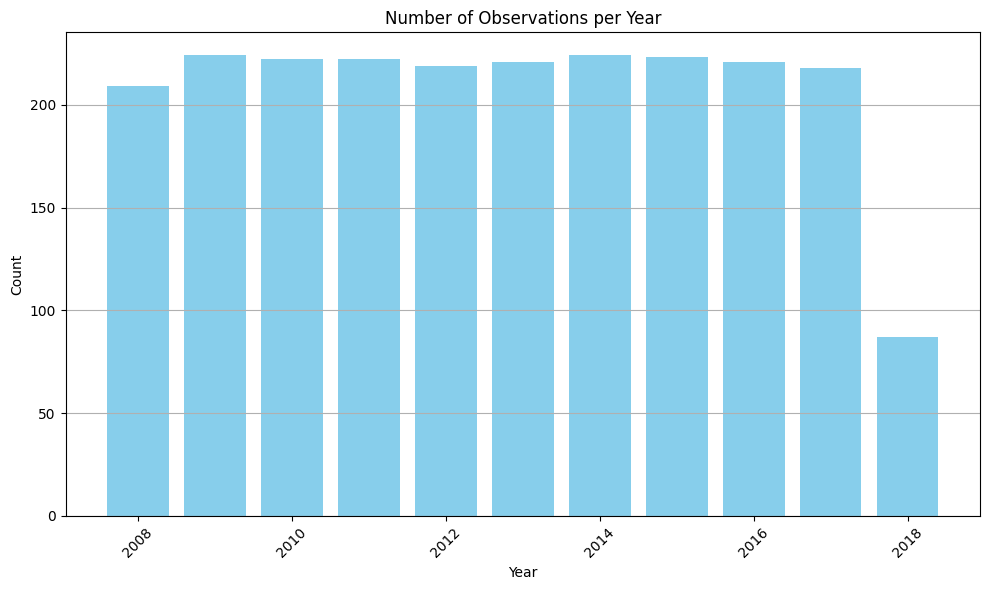

In [93]:
gold['Date'] = pd.to_datetime(gold['Date'])

# Extract year from 'Date' column
gold['Year'] = gold['Date'].dt.year

# Count occurrences of each year
year_counts = gold['Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Observations per Year')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

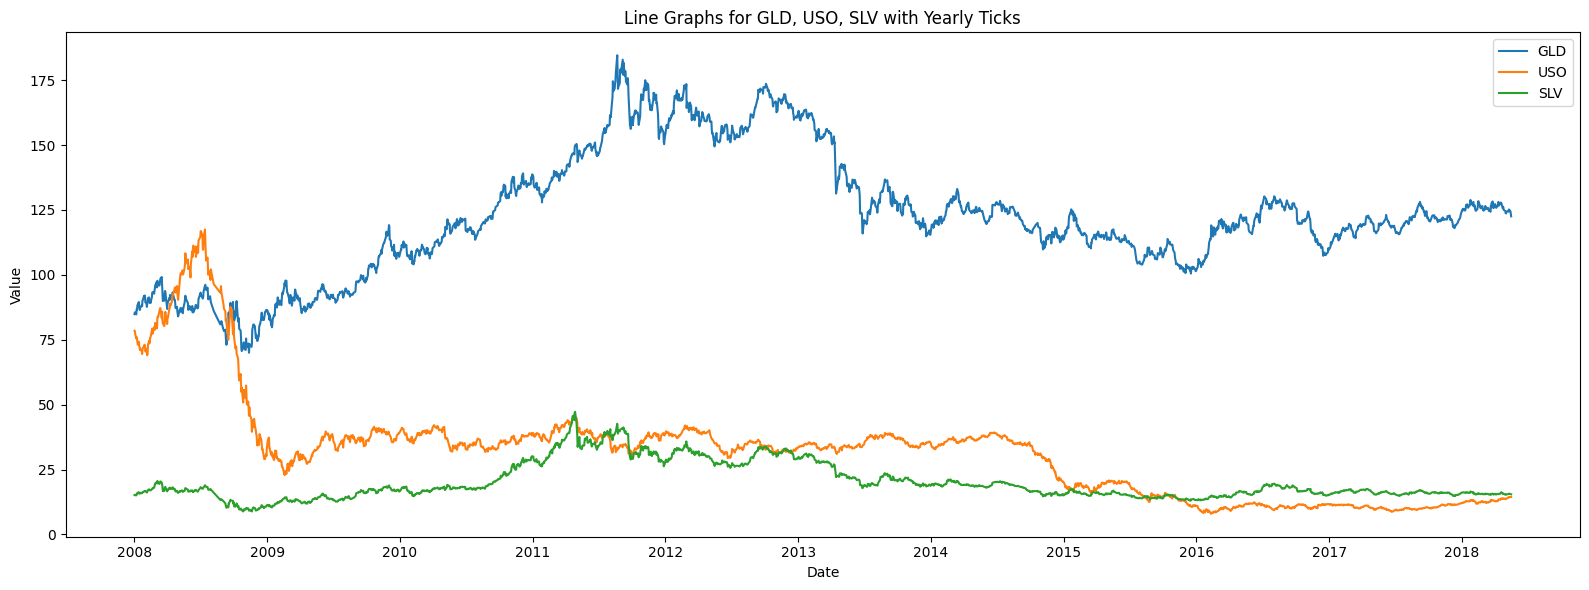

In [94]:
gold['Date'] = pd.to_datetime(gold['Date'])

# Plotting
plt.figure(figsize=(16, 6))

# Plot for 'GLD'
plt.plot(gold['Date'], gold['GLD'], label='GLD')
plt.plot(gold['Date'], gold['USO'], label='USO')
plt.plot(gold['Date'], gold['SLV'], label='SLV')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Line Graphs for GLD, USO, SLV with Yearly Ticks')
plt.legend()

# Formatting x-axis ticks to show only year once for each unique year
years_unique = gold['Date'].dt.year.unique()
plt.xticks(pd.to_datetime(years_unique, format='%Y'), years_unique)

plt.tight_layout()
plt.show()

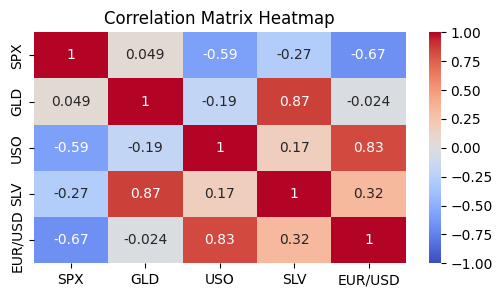

In [95]:
# Select numerical columns
numerical_columns = gold.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [96]:
# correlation values of GLD
print(correlation_matrix['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


Gold (GLD) shows a strong positive correlation with Silver (SLV) and very weak correlations with the S&P 500 (SPX), Oil (USO), and the Euro to US Dollar exchange rate (EUR/USD).

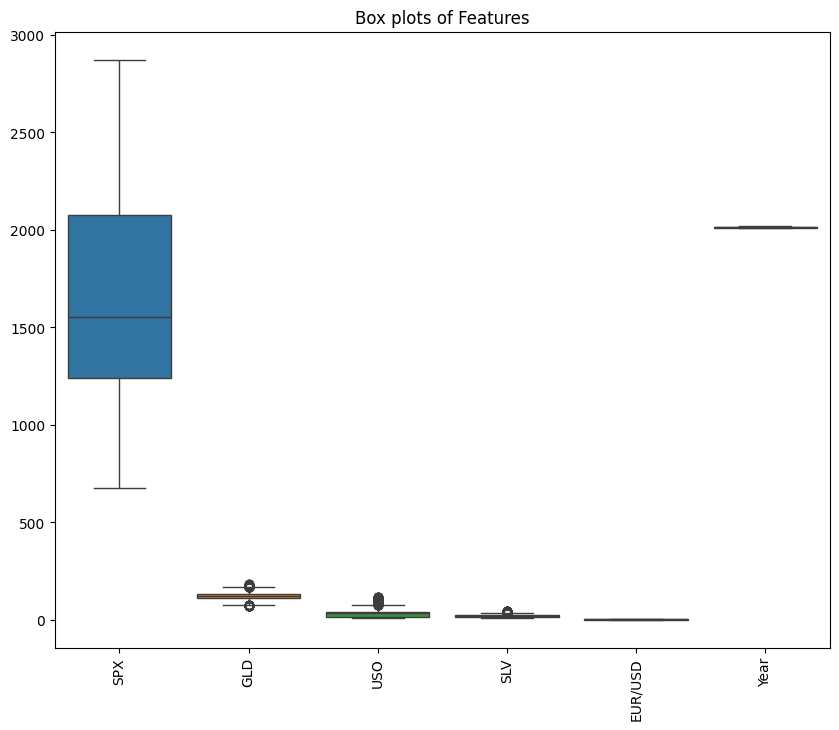

In [97]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=gold)
plt.title('Box plots of Features')
plt.xticks(rotation=90)
plt.show()

In [98]:
from scipy.stats.mstats import winsorize
gold['USO_winsorized'] = winsorize(gold['USO'], limits=[0.05, 0.1])
gold['SLV_winsorized'] = winsorize(gold['SLV'], limits=[0.05, 0.1])
gold.drop(['USO','SLV'],axis=1,inplace=True)

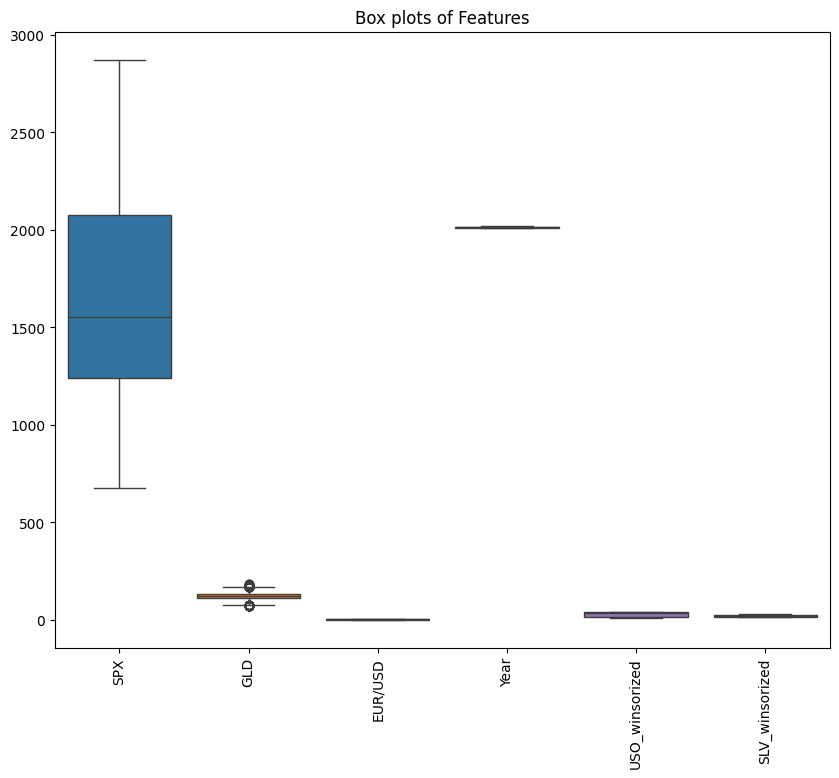

In [99]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=gold)
plt.title('Box plots of Features')
plt.xticks(rotation=90)
plt.show()

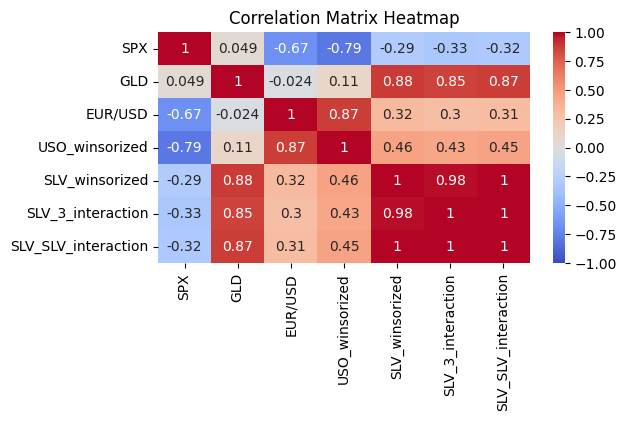

In [104]:
# Select numerical columns
numerical_columns = gold.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [101]:
gold['SLV_3_interaction'] = gold['SLV_winsorized'] * gold['SLV_winsorized']*gold['SLV_winsorized']
gold['SLV_SLV_interaction'] = gold['SLV_winsorized']*gold['SLV_winsorized']

In [102]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 2290 non-null   datetime64[ns]
 1   SPX                  2290 non-null   float64       
 2   GLD                  2290 non-null   float64       
 3   EUR/USD              2290 non-null   float64       
 4   Year                 2290 non-null   int32         
 5   USO_winsorized       2290 non-null   float64       
 6   SLV_winsorized       2290 non-null   float64       
 7   SLV_3_interaction    2290 non-null   float64       
 8   SLV_SLV_interaction  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int32(1)
memory usage: 152.2 KB


In [103]:
X = gold.drop(['GLD','Year', 'Date'], axis=1)
y=gold['GLD']

model = RandomForestRegressor()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature importances:\n", feature_importances)

Feature importances:
 SPX                    0.185462
EUR/USD                0.031150
USO_winsorized         0.023480
SLV_winsorized         0.265391
SLV_3_interaction      0.223243
SLV_SLV_interaction    0.271273
dtype: float64


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(1832, 6) (458, 6) (1832,) (458,)


In [107]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
from sklearn.neighbors import KNeighborsRegressor
# Initialize and fit the KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 1.4472970441048034
Mean Squared Error (MSE): 5.095692963961906
Root Mean Squared Error (RMSE): 2.2573641629036967
R^2 Score: 0.9907063761925855
